In [1]:
from IPython.display import Image

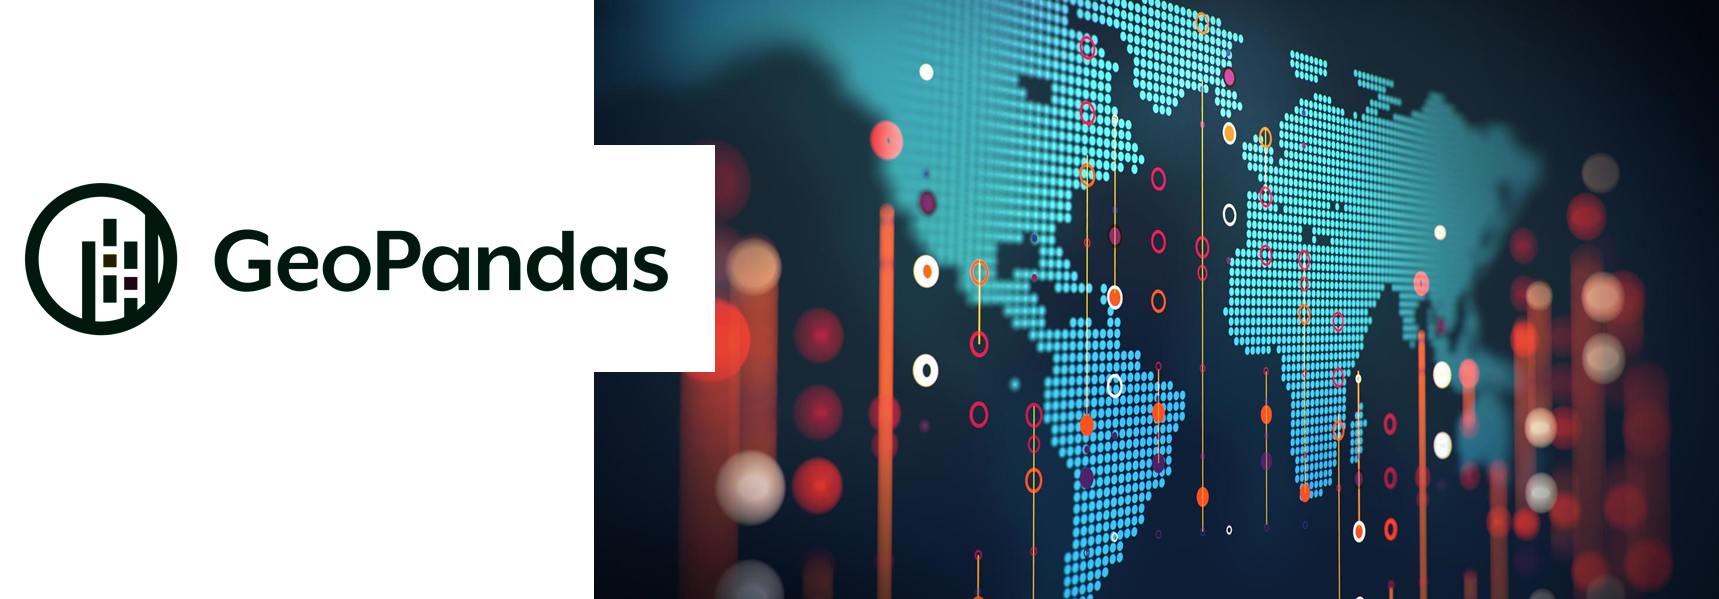

In [2]:
Image(filename='geo.png')

by Abraão Nascimento
# Why Geopandas? 

[Geopandas](https://geopandas.org/)  is one of the most powerful ways to work with geospatial data currently. Also, it is an open-source project to make working with geospatial data in python easier. It combines the capabilities of two powerful python libraries: pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely.

## Agenda:
__1.__ Set up environment<br>
__2.__ Read and visualize geospatial data <br>
__3.__ Plot, manipulate and execute geospatial operations <br>
__4.__ Salve your geospatial data <br>
__5.__ Mention <br>

### 1. Set up environment

Setting up your environment with github, docker and binder: https://mybinder.org/v2/gh/abraaonascimento/1_Hour_Geopandas_Training/HEAD


In [ ]:
pip install rtree

In [ ]:
pip install pygeos

In [ ]:
pip install geopandas

In [ ]:
pip install matplotlib

In [ ]:
import geopandas 

### 2. Read and visualize geospatial data
Geospatial data is available from specific GIS file formats like ESRI shapefiles, Geodatabase, GeoJSON files, geopackage files, PostgreSQL/PostGIS, etc. 

It is possible to use the GeoPandas library to read most all those GIS file formats since Geopandas uses GDAL/OGR in the background. 

Let's start by reading a shapefile with all the countries of the world (adapted from [naturalearthdata](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/), zip file is available in the /data directory), and inspect the data:

In [ ]:
countries = geopandas.read_file("zip://./data/countries.zip")

In [ ]:
countries.plot(figsize=(20,20)) 
#countries.plot(figsize=(20,20)) 

In [ ]:
countries.head(10)

As was presented above:

- By using .plot() method we can quickly get a basic visualization of the data
- By using .head() method we can see the first rows of the dataset, just like in excel or QGIS. 
- There is a 'geometry' column that keeps the geoinformation of the countries represented as polygons.

### 3. Plot, manipulate and execute geospatial operations

Such as ESRI shapefiles Geopandas dataframe format contains **attributes** (fields and records) and **geometry** (coordinates). Such as in QGIS we can use function and filter to manipulate the geodata

### Filtering

In [ ]:
lam = countries[countries['continent'] == 'South America']

In [ ]:
lam.plot(figsize=(12,12))

In [ ]:
bra = countries[countries['name'] == 'Brazil']

In [ ]:
bra.plot(figsize=(12,12))

### Population

In [ ]:
bra['pop_est']

In [ ]:
#"Population: " + "{:,}".format(int(bra['pop_est'].values[0]))

In [ ]:
#"{:,}".format(bra.area.values[0])

### Coordinate reference systems

In [ ]:
bra.crs

In [ ]:
bra_utm = bra.to_crs(epsg=3395)

In [ ]:
bra_utm.crs

### Geometries types: points, lines and polygons
Until now, we worked only with Polygons. Let's import points from that represents cities and lines that will represent the road-network. Here we will use data from [DNIT](http://servicos.dnit.gov.br/vgeo/) (National Department of Transport Infrastructure) and  [Natural Earth Data](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/)

In [ ]:
cities = geopandas.read_file("zip://./data/cities.zip")
roads  = geopandas.read_file("zip://./data/roads.zip")

In [ ]:
cities.plot(figsize=(20,20))

In [ ]:
#cities.head()

In [ ]:
roads.plot(figsize=(12,12))

In [ ]:
#roads.head() #roads.info()

### Visualize different layers together

In [ ]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
roads.plot(ax=ax)
cities.plot(ax=ax, color='red')

In [ ]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(16, 20))
roads.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-80, -30), ylim=(-40, 10))

### Geospatial operations

In [ ]:
Image(filename='spatial_operations.png')

Overview of functions to check spatial relationships:

- equals
- crosses
- overlaps
- touches
- `intersects`
- `within`

To check more manipulation and analysis of geometric objects please check the [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#predicates-and-relationships). 

<div class="alert alert-info" style="font-size:120%">
<b>EXERCISE</b> 
<ul>
  <li>Which cities pass within Brazil?</li>
  <li>Which roads intersects the urban areas in Brazil? </li>
</ul>

</div>


We already have the geometry of Brazil selected in the variable 'bra'. Let's use it to find the cities within the Brazil's polygon 

In [ ]:
bra.geometry.squeeze()

In [ ]:
bra_geometry = bra.geometry.squeeze()

In [ ]:
bra_cities = cities[cities.within(bra_geometry)] 

In [ ]:
bra_cities.head(30)

In [ ]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(12, 20))
bra_cities.plot(ax=ax, color='red')

To simulate urban areas we can create buffers using the POINT objects that represents the filtered cities within Brazil

In [ ]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(12, 20))
bra_cities.buffer(5).plot(ax=ax,color='red')

<div  style="font-size:100%" background-color="tomato">
<b>NOTE</b> 
<ul>
 <li>Within the buffer function, it was used the number 5 '.buffer(5)'. In this case, 5 means 5 degrees. This is the reason why we got large buffers.</li>
  <li>To convert degrees to meters, we can transform the geographic coordinate system to a '2D' cartesian plan. That is also the possibility to manually convert degrees to meters, but it is not pratical</li>
     <li> Approximate metric equivalents for degrees: 0.00001° = 1.11 meters </li>
</ul>

</div>

In [ ]:
cities = bra_cities.to_crs(epsg=3395)  # 1. Converting geographic to a metric coordinate system

In [ ]:
urban_areas = cities.buffer(50000)     # 2. Creating 50km buffer

In [ ]:
urban_areas = urban_areas.to_crs(epsg=4326) # 3. Converting back: metric to geographic coordinate system

In [ ]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(12, 20))
urban_areas.plot(ax=ax,color='red')

<div  style="font-size:100%" background-color="tomato">
<b>NOTE</b> 
<ul>
 <li>The buffer function gives back just the geometry. This operation does not keet the attributes</li>
  <li>To get the attributes back we can replace the cities 'points' (city center) with cities 'polygons' (urban areas)</li>
</ul>

</div>

In [ ]:
urban_areas

In [ ]:
bra_cities['geometry'] = urban_areas  # 4. Getting back the attributes 

With the 50km buffer created it is possible to get all the roads that intersects our simulated urban areas 

In [ ]:
urban_roads = geopandas.sjoin(roads, bra_cities, op='intersects')  # 5. Find which roads intersects the urban capitals of Brazil by using spatial join. 

In [ ]:
ax = bra.plot(edgecolor='k', facecolor='none', figsize=(12, 20))
#roads.plot(ax=ax)
bra_cities.plot(ax=ax)
urban_roads.plot(ax=ax,color='red')

### 4. Salve your geospatial data

To end let's save the data. In Geopandas we can save files in many formats: ESRI shapefiles, Geodatabase, GeoJSON files, geopackage files. You can check all the options in [Geopandas User Guide](https://geopandas.org/docs/user_guide/io.html). <br>
In this exercise, we will be saving the data in the ESRI Shapefile format. 

In [ ]:
bra.to_file("country_bra.shp")

In [ ]:
bra_cities.to_file("cities_bra.shp")

In [ ]:
urban_roads.to_file("urban_roads_bra.shp")

### 5. Mention 
This training was created based on the open resources:
 - [Geopandas - An Introduction](https://medium.com/thoughtful-data-science/geopandas-an-introduction-c544a352c662)
 - [Introduction to Geospatial Data Analysis with Python](https://github.com/geopandas/scipy2018-geospatial-data)
 - [Geopandas - User Guide](https://geopandas.org/index.html)
 - [Shapely - User Guide](https://shapely.readthedocs.io/en/stable/manual.html)


### Thank you!